In [25]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from tqdm import tqdm

In [26]:
p1 = sym.Symbol("p1", Real=True)
p2 = sym.Symbol("p2", Real=True)

prob1 = 3*p1*0.5*0.5*0.5
prob2 = 3*(1-p1)*0.5*0.5*0.5
probT = prob1+prob2
probT

0.375000000000000

In [27]:
def ProbTruncada(P1,P2,N=100):
    p1 = sym.Symbol("p1", Real=True)
    p2 = sym.Symbol("p2", Real=True)
    probT = (p1*p2*0.5*0.5)+2*(p1*(1-p2)*0.5*0.5)+2*((1-p1)*p2*0.5*0.5)+((1-p1)*(1-p2)*0.5*0.5) 
    Pt = np.zeros((N,N))
    
    for i in tqdm(range(N)):
        for j in range(N):
            Pt[i,j] = probT.subs(p1,P1[i]).subs(p2,P2[j])
    
    return P 

In [28]:
N = 25
P1 = np.linspace(0.1,0.9,N)
P2 = np.linspace(0.1,0.5,N)   
Pt = ProbTruncada(P1,P2,N)
max = np.where(np.amax(P)==P)
min = np.where(np.amin(P)==P)
i,j = int(max[0]),int(max[1])
k,l = int(min[0]),int(min[1])

print("Máxima:",Pt[i,j],", Prob 1:",P1[i],", Prob 2:",P2[j])
print("Mínima:",Pt[k,l],", Prob 1:",P1[k],", Prob 2:",P2[l])

100%|██████████| 25/25 [00:00<00:00, 69.90it/s]

Máxima: 0.45499999999999996 , Prob 1: 0.9 , Prob 2: 0.1
Mínima: 0.29500000000000004 , Prob 1: 0.1 , Prob 2: 0.1


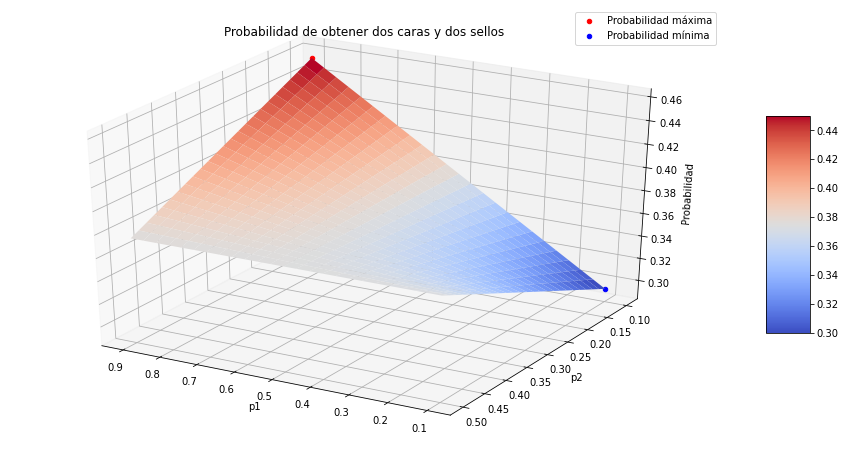

In [29]:
X,Y=np.meshgrid(P1,P2)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("p1")
ax.set_ylabel("p2")
ax.set_zlabel("Probabilidad")
surf = ax.plot_surface(X, Y, P.T, cmap="coolwarm",
                       linewidth=0, antialiased=True)
ax.set_title("Probabilidad de obtener dos caras y dos sellos")
ax.scatter(P1[i],P2[j],P[i,j],c="r",label="Probabilidad máxima")
ax.scatter(P1[k],P2[l],P[k,l],c="#0000FF",label="Probabilidad mínima")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 120)
ax.legend()